# Simple Linear Regression with Perceptron

## Table of Contents
1. [What is a Simple Linear Regression Model](#1.0)
2. [Finding the Parameters](#2.0)
   1. [Loss Function(L) and Cost Function(C)](#2.1)
   2. [Partial Derivatives](#2.2)
   3. [Forward and Back Propagation](#2.3)
3. [Implementation](#3.0)
   1. [Dataset](#3.1)
   2. [Data Preprocessing](#3.2)
   3. [Training the Model](#3.3)
   4. [Model](#3.4)
   5. [Predictions](#3.5)
   6. [Comparing results with scikit learn](#3.6)


<a id="1.0"></a>
## What is a Simple Linear Regression Model


A simple linear regression involves drawing a line ($\hat{y} = wx + b$) that best describes the relationship between two variables.
In other words, given a set of x-axis values, we aim to predict the corresponding y-axis values. For each prediction, we
plug the $x$ values into the equation of the line to obtain the predicted value $\hat{y}$.
For each prediction, we calculate the residual error as the difference between the the predicted value $\hat{y}$ and the observed value $y$.
The line that minimizes the sum of the squared residuals is chosen, ensuring that no other line provides a smaller sum.

$$\text{Sum of squared residuals for n predictions} =\sum_{i=1}^{n} \left( \hat{y}_{i} - y_{i} \right)^2$$


<a id="2.0"></a>
## Finding the Parameters 

For this case, we need to determine the parameters $w$ and $b$. First we must define an equation (the loss function) that measures the error for individual predictions. To optimize the mode, we use a cost function, which is the average of the loss function over all training examples. With the cost function defined, in terms of the parameters $w$ and $b$, we can apply gradient descent to find the values that minimize it. This involves calculating the partial derivatives of the cost function with respect to $w$ and $b$ and iteratively updating the parameters in the direction that reduces the error.

<a id="2.1"></a>
### Loss Function(L) and Cost Function(C)

$$\hat{y} = wx + b$$
$$\text{L} =\sum_{i=1}^{n} \left( \hat{y}_{i} - y_{i} \right)^2$$
$$\text{C} =\frac{\sum_{i=1}^{n} \left( \hat{y}_{i} - y_{i} \right)^2}{n}\frac{1}{2}$$
 

For this case of cost function, we will divide by two merely for convenience, as taking the partial derivative will result in a simpler expression

<a id="2.2"></a>
### Partial Derivatives

\begin{align}
\frac{\partial \mathcal{C} }{ \partial w } &= 
\frac{1}{n}\sum_{i=1}^{n} \left(\hat{y}_{i} - y_{i}\right)x_{i},\\
\frac{\partial \mathcal{C} }{ \partial b } &= 
\frac{1}{n}\sum_{i=1}^{n} \left(\hat{y}_{i} - y_{i}\right).
\end{align}

<a id="2.3"></a>
### Forward and Back Propagation

The goal at the end of the algorithm is to determine the optimal 
𝑤 and 𝑏

Forward Propagation:
We must first guess any value for 𝑤, and b. 
typically 𝑏 is initialized to 0. 
Using these parameters, we can calculate our initial cost.

Backward Propagation:
We now determine the corrections for the parameters based on gradient descent:

\begin{align}
\alpha &= \text{learning rate}, \\
w_{2} &= w_{1} - \alpha \frac{\partial \mathcal{C} }{ \partial w }, \\
b_{2} &= b_{1} - \alpha \frac{\partial \mathcal{C} }{ \partial b }.
\end{align}


Now, using the new 𝑤 and 𝑏, we perform the process again for a predetermined number of cycles. The calculated cost should decrease until it converges. Once convergence is achieved, we will have the optimal 𝑤 and 𝑏.

<a id="3.0"></a>
## Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(3)

<a id="3.1"></a>
### Dataset

In [2]:
path = "data/tvmarketing.csv"

df = pd.read_csv(path)

In [3]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


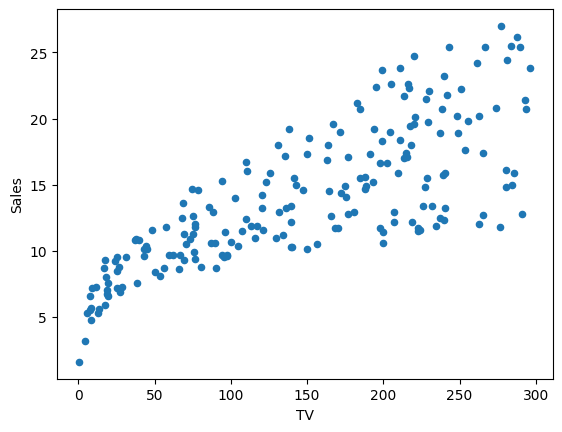

In [4]:
df.plot(x='TV',y = 'Sales', kind = 'scatter')
plt.show()

<a id="3.2"></a>
### Data Preprocessing

#### Normalization
We need to normalize the values first to help gradient descent converge more efficiently.

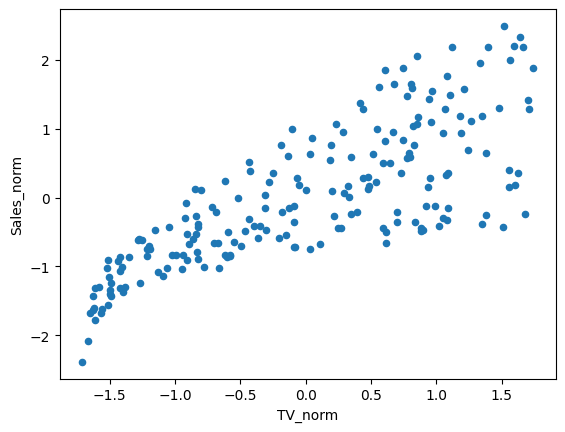

In [5]:
df['TV_norm'] = (df['TV'] - np.mean(df['TV']))/np.std(df['TV'])
df['Sales_norm'] = (df['Sales'] - np.mean(df['Sales']))/np.std(df['Sales'])
df.plot(x='TV_norm', y='Sales_norm', kind='scatter')
plt.show()

#### Arranging the values into a row vector

In [6]:
X_norm = df['TV_norm']
Y_norm = df['Sales_norm']

X_norm = np.array(X_norm).reshape((1,len(X_norm)))
Y_norm = np.array(Y_norm).reshape((1,len(Y_norm)))

print(f'The shape of X_norm: {str(X_norm.shape)}')
print(f'The shape of Y_norm: {str(Y_norm.shape)}')

The shape of X_norm: (1, 200)
The shape of Y_norm: (1, 200)


<a id="3.3"></a>
### Training the model

Cost for iteration 1: 0.4861688708015972
Cost for iteration 2: 0.20574673042402977
Cost for iteration 3: 0.19452984480892715
Cost for iteration 4: 0.19408116938432307
Cost for iteration 5: 0.19406322236733892
Cost for iteration 6: 0.19406250448665952
Cost for iteration 7: 0.19406247577143237
Cost for iteration 8: 0.19406247462282328
Cost for iteration 9: 0.1940624745768789
Cost for iteration 10: 0.19406247457504114
Cost for iteration 11: 0.19406247457496761
Cost for iteration 12: 0.1940624745749647
Cost for iteration 13: 0.19406247457496456
Cost for iteration 14: 0.1940624745749646


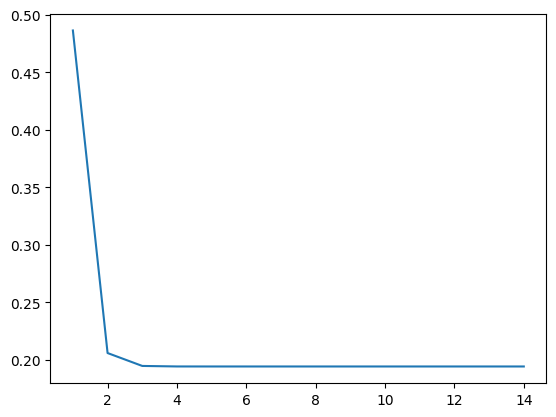

w: 0.7822244247363778
b: -2.7711166694643897e-16


In [7]:
# Random initialization of w
w = np.random.randn(1,1)*0.01
# Initiating b as 0
b = np.zeros((1,1))
# Defining the learning rate
lr = 1.2
# percentage difference between an error and its subsequent one
diff = 0.0000000000000001

# cost log for each iteration
cost_list = []
# counter for each iteration as a list and initial counter_count c
count_list = []
c = 0
# getting the total number of predictions
size = X_norm.size
# loop start
while True:
    # forward propagation
    y_hat = np.matmul(w,X_norm) + b
        # computing cost for the current iteration
    cost = np.sum((y_hat - Y_norm)**2)/(2*size)
        # saving the cost value in a list
    cost_list.append(cost)

    # backward propagation
        # partial derivatives
    dw = 1/size * np.matmul((y_hat - Y_norm),X_norm.T)
    db = 1/size *np.sum(y_hat - Y_norm)
        # updating parameters
    w = w - dw*lr
    b = b - db*lr

    #updating counter and saving in a list
    c = c + 1
    count_list.append(c)
    # display the cost for each iteration
    print(f'Cost for iteration {c}: {cost}')
    
    # Checking if the difference between the last two costs is acceptable
    if len(cost_list) >1:
        if ((cost_list[-2] - cost_list[-1])/cost_list[-2]) < diff:
            break
        elif c==100:
            break
w = w[0][0]
b = b[0][0]
# plot the cost for each iteraction
plt.plot(count_list,cost_list)
plt.show()
print(f'w: {w}')
print(f'b: {b}')

<a id="3.4"></a>
### Model

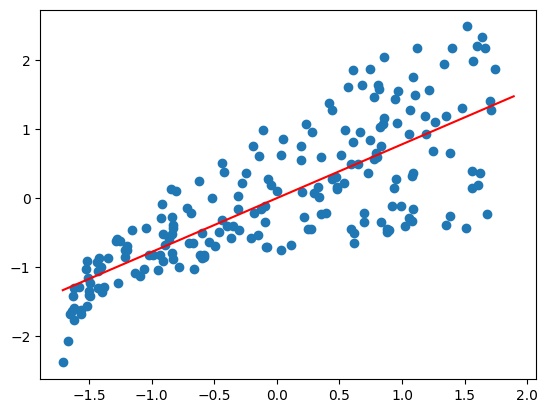

In [8]:
x_p = np.arange(np.min(X_norm),np.max(X_norm)*1.1,0.1)
plt.scatter(X_norm,Y_norm)
plt.plot(x_p, w*x_p+b, "red")
plt.show()

<a id="3.5"></a>
### Predictions

In [9]:
# values to predict
X_pred = [0,50, 120, 280]
# values to predict normalized
X_pred_norm = []
# predicted values normalized
Y_pred_norm = []
# predicted values denormalized
Y_pred = []

# normalize values do predict
for n in X_pred:
    X_pred_norm.append((n - np.mean(df['TV']))/np.std(df['TV']))

# prediction 
for n in X_pred_norm:
    Y_pred_norm.append((n*w)+b)

# denormalize predicted values
for n in Y_pred_norm:
    Y_pred.append( (n*np.std(df['Sales']))+np.mean(df['Sales']))

print(Y_pred)


[7.032593550246733, 9.409425571517204, 12.736990401295865, 20.342852869361373]


<a id="3.6"></a>
### Comparing results with scikit learn

In [41]:
from sklearn.linear_model import LinearRegression
X_norm = df['TV']
X_norm = np.array(X_norm).reshape(-1,1)
Y_norm = df['Sales']
Y_norm = np.array(Y_norm).reshape(-1,1)

model = LinearRegression()
model.fit(X_norm,Y_norm)
Y_pred_2 = model.predict(X_pred.reshape(-1,1))
Y_pred_2 = Y_pred_2.ravel()

print(f'Resultado model created: {Y_pred}')
print(f'Resultado scikit learn: {Y_pred_2}')

Resultado model created: [7.032593550246733, 9.409425571517204, 12.736990401295865, 20.342852869361373]
Resultado scikit learn: [ 7.03259355  9.40942557 12.7369904  20.34285287]
